## 今天的範例，帶大家運用python 裡面的套件
* 如何模擬這些分配的樣本點
* 進行一些機率的運算

包含以下離散型分配        

1. 離散均勻分配( Discrete Uniform Distribution )     
2. 伯努利分配( Bernoulli Distribution )    
3. 二項分配(Binomial Distribution)   


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics

### 1. 離散均勻分配( Discrete Uniform Distribution )

[1 2 3 4 5 6]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


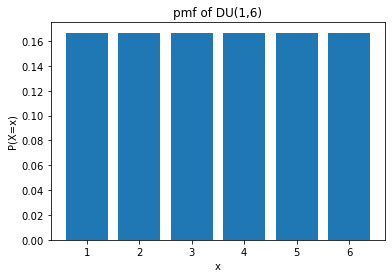

In [2]:
'''
# 離散均勻分配 (Discrete Uniform Distribution)
# 前提：其中有限個數值擁有相同的機率。
'''
# 1.定義離散均勻分配的基本資訊

low=1 
high=7
r = np.arange(low,high)
# 2.計算離散均勻分配的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# 產生 x 軸的點
#r = np.arange(stats.randint.ppf(0.01, low, high),
#              stats.randint.ppf(0.99, low, high),1)
print(r)
# P(X=x) --> 是機率
probs = stats.randint.pmf(r,low,high)
print(probs)
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('pmf of DU(1,6)')
plt.show()

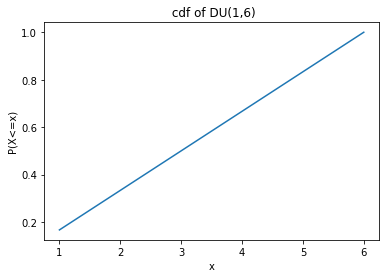

In [3]:
# 3.計算離散均勻分配的累積機率 (cumulative density function)，pmf 的累加
# P(X=x) --> 是機率
cumsum_probs = stats.randint.cdf(r, low,high)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title(' cdf of DU(1,6)')
plt.plot(r, cumsum_probs)
plt.show()

In [4]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
k = stats.randint.ppf(cumsum_probs , low, high)
print(k)
#看上圖看結果

[1. 2. 3. 4. 5. 6.]


[6 1 2 2 5 4 6 5 1 2 3 1 4 1 1 2 5 1 1 4]


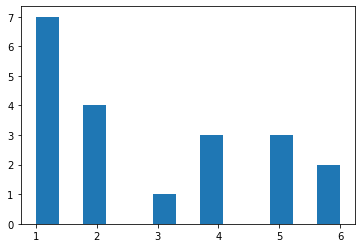

In [8]:
# 5.產生符合隨機樣本點 (random sample)
X = stats.randint.rvs(low,high,size=20)
print(X)
plt.hist(X,bins=13)
plt.show()
#試試看，，每一次的結果一樣嗎?

In [9]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_randint=stats.randint.stats(low,high,moments='mvks')
print(stat_randint)
print(type(stat_randint))
print("randint mean=",float(stat_randint[0]))
print("randint variance=",float(stat_randint[1]))
print("randint kurtosis=",float(stat_randint[2]))
print("randint skew=",float(stat_randint[3]))

(array(3.5), array(2.91666667), array(0.), array(-1.26857143))
<class 'tuple'>
randint mean= 3.5
randint variance= 2.9166666666666665
randint kurtosis= 0.0
randint skew= -1.2685714285714285


### 2. 伯努利分配( Bernoulli Distribution )

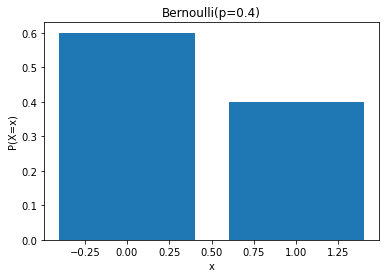

In [10]:
'''
# 伯努利分配( Bernoulli Distribution )
# 前提：是只有兩種可能結果（成功或失敗）的單次隨機試驗，成功的機率為p
'''
# ①定義伯努利分配的基本資訊

# ①定義伯努利分配基本資訊
p = 0.4 # 事件A 機率 0.4
r = np.arange(0,2) # 可以出現的範圍為 0、1,2種可能出現的結果

# ②計算二項分佈的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# P(X=x) --> 是機率
probs = stats.bernoulli.pmf(r,p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('Bernoulli(p=0.4)')
plt.show()


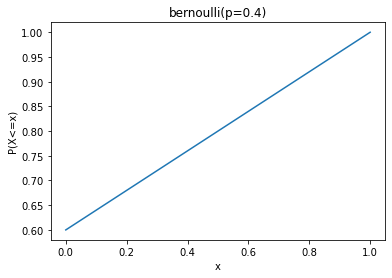

In [11]:
# ③計算伯努利分配的累積機率 (cumulative density function)，pmf 的累加
# P(X=x) --> 是機率
cumsum_probs = stats.bernoulli.cdf(r,p)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('bernoulli(p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

In [12]:
# ④ 透過 cdf ，給定一個 機率值，反推出對應到的 x
p_loc = stats.bernoulli.ppf(cumsum_probs, p)
print(p_loc)
#看上圖看結果

[0. 1.]


[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0]


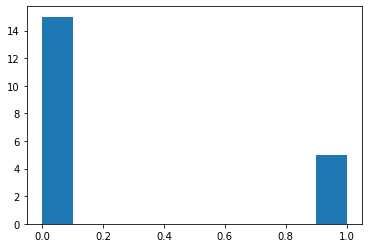

In [14]:
# ⑤產生符合伯努利分配的隨機樣本點 (random sample)
X = stats.bernoulli.rvs(p,size=20)
print(X)
plt.hist(X)
plt.show()
#試試看，每一次的結果一樣嗎?

In [15]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_ber=stats.bernoulli.stats(p,moments='mvks')
print(stat_ber)
print(type(stat_ber))
#E(X)
print("bernoulli mean=",float(stat_ber[0]))
print("bernoulli variance=",float(stat_ber[1]))
print("bernoulli kurtosis=",float(stat_ber[2]))
print("bernoulli skew=",float(stat_ber[3]))

(array(0.4), array(0.24), array(0.40824829), array(-1.83333333))
<class 'tuple'>
bernoulli mean= 0.4
bernoulli variance= 0.24
bernoulli kurtosis= 0.40824829046386296
bernoulli skew= -1.8333333333333337


### 3. 二項分配(Binomial Distribution)

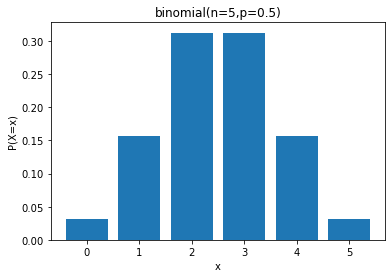

In [16]:
'''
# 二項分佈 (binomial distribution)
# 前提：獨立重複試驗、有放回、只有兩個結果
# 二項分佈指出，隨機一次試驗出現事件A的機率如果為p，那麼在重複 n 次試驗中出現 x 次事件A的機率為：
# f(n,x,p) = choose(n, x) * p**x * (1-p)**(n-x)
'''
# 1.定義二項分佈的基本資訊
p = 0.5 # 事件A 機率 0.4
n = 5  # 重複實驗5次,
r = np.arange(0,6) # 可以出現的範圍為 0,1,2,...,5-->6種可能出現的結果
#print(type(k))

# 2.計算二項分佈的概率質量分佈 (probability mass function)
# 之所以稱為質量，是因為離散的點
# P(X=x) --> 是機率
probs = stats.binom.pmf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.5)')
plt.show()

#學生額外小練習: 可以調整 p 的不同值，p接近於1 時，p=0.5, p 接近於 0時，看 pmf 的變化。

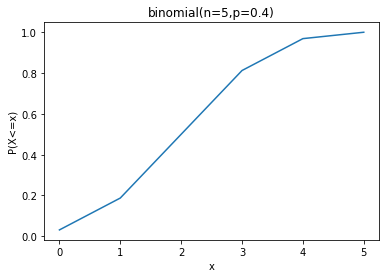

In [17]:
# 3.計算二項分佈的累積機率 (cumulative density function)，pmf 的累加
# 之所以稱為質量，是因為離散的點，預設體積（即寬度）為1
# P(X=x) --> 是機率
cumsum_probs = stats.binom.cdf(r, n, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

In [18]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
p_loc= stats.binom.ppf(cumsum_probs, n, p)
print(p_loc)
#看上圖看結果

[0. 1. 2. 3. 4. 5.]


[5 4 3 3 0 1 3 3 1 3 3 4 2 0 4 2 4 3 3 2]


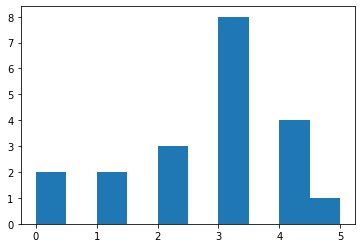

In [19]:
# 5.產生符合二項分佈的隨機樣本點 (random sample)
X = stats.binom.rvs(n,p,size=20)
#array([2, 3, 1, 2, 2, 2, 1, 2, 2, 3, 3, 0, 1, 1, 1, 2, 3, 4, 0, 3])
print(X)
plt.hist(X)
plt.show()
#試試看，，每一次的結果一樣嗎?

In [20]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_bin=stats.binom.stats(n,p,moments='mvks')
print(stat_bin)
print(type(stat_bin))
#E(X)
print("binomial mean=",float(stat_bin[0]))
print("binomial variance=",float(stat_bin[1]))
print("binomial kurtosis=",float(stat_bin[2]))
print("binomial skew=",float(stat_bin[3]))

(array(2.5), array(1.25), array(0.), array(-0.4))
<class 'tuple'>
binomial mean= 2.5
binomial variance= 1.25
binomial kurtosis= 0.0
binomial skew= -0.4
